# Local Binary Patterns


In [14]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

## LBP 연산

중심 값보다 크거나 같은 값을 가진 픽셀은 1
```python
if img[x][y] >= center:
            new_value = 1
```
그 외의 경우는 0을 반환  

In [15]:
def get_pixel(img, center, x, y):
    new_value = 0
    try:
        if img[x][y] >= center:
            new_value = 1
    except:
        pass
    return new_value

## LBP 호출
```
 | 1 | 2 | 3 |
 | 4 | 5 | 6 |
 | 7 | 8 | 9 |
```
중심 값에 대해 `get_pixel`을 계산한 후, `val_ar` 리스트에 저장하고,  
이를 마지막에 10 진수로 변환하여 출력


In [16]:
def lbp_calculated_pixel(img, x, y):
    center = img[x][y]
    val_ar = []
    val_ar.append(get_pixel(img, center, x, y-1))       # left
    val_ar.append(get_pixel(img, center, x+1, y-1))     # bottom_left
    val_ar.append(get_pixel(img, center, x+1, y))       # bottom
    val_ar.append(get_pixel(img, center, x+1, y+1))     # bottom_right
    val_ar.append(get_pixel(img, center, x, y+1))       # right
    val_ar.append(get_pixel(img, center, x-1, y+1))     # top_right
    val_ar.append(get_pixel(img, center, x-1, y-1))     # top_left
    return int(''.join([str(i) for i in val_ar]), 2)

In [22]:
image_file = 'lenna.jpg'
img_bgr = cv2.imread(image_file)
height, width, channel = img_bgr.shape
img_gray = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2GRAY)

img_lbp = np.zeros((height, width,3), np.uint8)
for i in range(0, height):
    for j in range(0, width):
         img_lbp[i, j] = lbp_calculated_pixel(img_gray, i, j)
hist_lbp = cv2.calcHist([img_lbp], [0], None, [256], [0, 256])

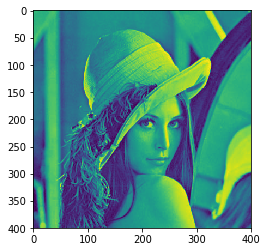

In [23]:
plt.imshow(img_gray)

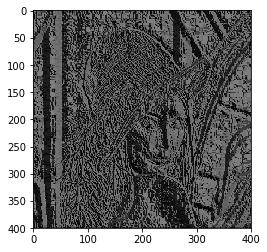

In [24]:
plt.imshow(img_lbp)

(array([147.,  21.,  10.,  10.,   6.,   7.,   8.,   1.,   0.,   3.,   2.,
          1.,   0.,   0.,   0.,   2.,   3.,   2.,   0.,   1.,   0.,   2.,
          0.,   0.,   1.,   1.,   0.,   0.,   2.,   0.,   1.,   2.,   0.,
          1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   3.,   2.,   1.,
          1.,   0.,   2.,   2.,   1.,   0.,   0.,   1.,   1.,   0.,   0.,
          0.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   1.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0., 

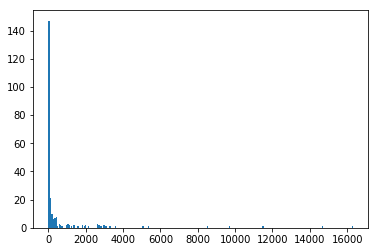

In [25]:
plt.hist(hist_lbp, bins=256)